In [3]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4
ds =xr.open_dataset("C:/Users/CMPG/Desktop/Arvind/R/Verification/gpcp_mjj_2003_2019.nc")
ds1 =xr.open_dataset("C:/Users/CMPG/Desktop/Arvind/R/Verification/ens_regrid_mjj_2003_2019.nc")
lat = ds.variables['Y'][:]
lon = ds.variables['X'][:]
pcp_obs = ds.variables['precip'][:,:,:]
pcp_fcst = ds1.variables['precip'][:,:,:]
time = ds.variables['T'][:]
xx = ds1.precip.values
yy = ds.precip.values

C:\Users\CMPG\anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\CMPG\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


No handles with labels found to put in legend.


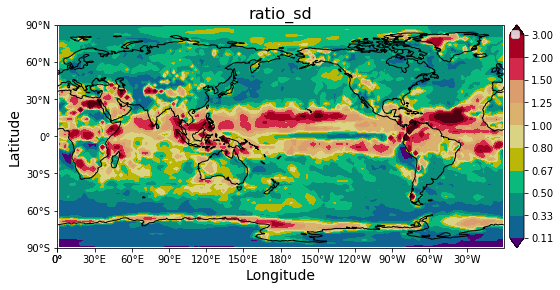

In [92]:
# Ratio between standard deviation 

pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values
def ratio_sd(pcp_fcst, pcp_obs):
    std_pcp_obs = np.std(pcp_obs,axis = 0)
    std_pcp_fcst= np.std(pcp_fcst, axis = 0)
    ratio_sd = (std_pcp_fcst)/(std_pcp_obs)
    return ratio_sd

ratio_sd = ratio_sd(pcp_fcst, pcp_obs)


from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
scale = '110m'
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_global()
#colours =['#02385c', '#306e96', '#779db5', '#9cc3db', '#c0e4fa', '#e3f3fc', '#f5fbff',
 #         '#fcfcfc', '#ffffff',  '#fff8e0', '#ffd796', '#ffa95e', '#ff8345', '#f7794f', 
  #        '#b82e00', '#a34424','#7a2d12','#870404']

colours  =['#500075', '#0f6491', '#098f7b', '#09ba7c', '#bab706',
           '#dbd384', '#dbb16e', '#db9d6e', '#d4284b' ,'#a60022','#4f0111']

levels = [0.11,0.33,0.5,0.67,0.8,1,1.25,1.5,2,3]

cp= plt.contourf(lon, lat,ratio_sd ,transform=ccrs.PlateCarree(),
                 levels = levels ,colors =colours, extend ='both')
ax.coastlines(scale)
ax.set_xticks([0, 30,60,90, 120,150, 180,210, 240,270, 300,330, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.xlabel('Longitude', fontsize ='14')
plt.ylabel('Latitude', fontsize = '14')
plt.title("ratio_sd", fontsize = '16')
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.025,ax.get_position().height])
plt.colorbar(cp, cax=cax) 
fig1 = plt.gcf()
fig1.savefig('ratio_sd_2003_2019.png', dpi=100)
plt.legend()






In [60]:
# Standard deviation
pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values
def std_pcp_obs(pcp_obs):
    std_pcp_obs = np.std(pcp_obs, axis = 0)
    return std_pcp_obs

def std_pcp_fcst(pcp_fcst):
    std_pcp_fcst = np.std(pcp_fcst ,axis = 0)
    return std_pcp_fcst
# Ratio between standard deviation 

pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values
def ratio_sd(pcp_fcst, pcp_obs):
    std_pcp_obs = np.std(pcp_fcst,axis = 0)
    std_pcp_fcst= np.std(pcp_obs, axis = 0)
    ratio_sd = (std_pcp_fcst)/(std_pcp_obs)
    return ratio_sd

SD_ratio    = ratio_sd(pcp_fcst, pcp_obs)
SD_analysis = std_pcp_obs(pcp_obs)
SD_model    = std_pcp_fcst(pcp_fcst)

In [10]:
#mean_error
def bias(pcp_fcst, pcp_obs):
    diff = pcp_fcst - pcp_obs
    bias = np.mean(diff , axis = 0)
    return bias
BIAS = bias(pcp_fcst,pcp_obs)

In [67]:
# Climatology
def clim(pcp_obs):
    clim = np.nanmean(pcp_obs,axis =0)
    return clim

clim_analysis = clim(pcp_obs)
clim_model    = clim(pcp_fcst)

1.4277921521272975e-05

In [12]:
#Root Mean Squre Error
pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values

def rmse(pcp_fcst,pcp_obs):
    temp = np.mean(((pcp_fcst- pcp_obs)**2),axis =0)
    rmse = np.sqrt(temp)
    return rmse

    
result = rmse(pcp_fcst, pcp_obs)

In [13]:

#Anomaly_Correlation Coefficient
def ACC(FC,OBS,CL):
    top = np.mean((FC-CL)*(OBS-CL), axis = 0)
    temp = np.mean(((FC- CL)**2),axis =0)
    temp1= np.mean(((FC- CL)**2),axis =0)
    bottom = np.sqrt(temp3)
    ACC = top/bottom
    return ACC

In [14]:
# Correlation

pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values
def Corr(pcp_obs, pcp_fcst):
    mean_pcp_obs = np.nanmean(pcp_obs, axis =0)
    mean_pcp_fcst = np.nanmean(pcp_fcst, axis = 0)
    
    diff_o = pcp_obs - mean_pcp_obs
    diff_f = pcp_fcst - mean_pcp_fcst
    std_pcp_obs  =np.std(pcp_obs, axis =0)
    std_pcp_fcst =np.std(pcp_fcst, axis =0)
    bottom = np.multiply(std_pcp_obs , std_pcp_fcst)
    temp = np.multiply(diff_o, diff_f)
    top = np.average(temp, axis = 0)
    Corr = top/bottom
    return Corr

In [15]:
# Anomaly Correlation Coefficient
pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values
def ACCR(pcp_obs, pcp_fcst):    
    mean_pcp_obs = np.nanmean(pcp_obs, axis =0)
    mean_pcp_fcst = np.nanmean(pcp_fcst, axis = 0)
    anom_o       = pcp_obs - mean_pcp_obs
    anom_f       = pcp_fcst - mean_pcp_fcst
    mean_anom_obs = np.nanmean(anom_o , axis = 0)
    mean_anom_fcst = np.nanmean(anom_f ,axis = 0)
    anom_diff_o =anom_o - mean_anom_obs
    anom_diff_f =anom_f - mean_anom_fcst
    std_anom_o  =np.std(anom_o, axis =0)
    std_anom_f =np.std(anom_f, axis =0)
    bottom = np.multiply(std_anom_o , std_anom_f)
    temp = np.multiply(anom_diff_o, anom_diff_f)
    top = np.nanmean(temp, axis = 0)
    ACCR = top/bottom
    return ACCR

In [68]:
# Bias Correction
def BC(pcp_fcst,pcp_obs):
    mean_pcp_fcst = np.nanmean(pcp_fcst , axis = 0)
    mean_pcp_obs  = np.nanmean(pcp_obs,   axis = 0)
    std_pcp_fcst  = np.std(pcp_fcst , axis = 0)
    std_pcp_obs   = np.std(pcp_obs , axis = 0)
    fcst_anom     = pcp_fcst - mean_pcp_fcst
    BC_1          = fcst_anom + mean_pcp_obs
    temp =  (std_pcp_obs/ std_pcp_fcst)
    temp1 = temp*fcst_anom
    BC   = temp1 +mean_pcp_obs
    return BC
pcp_fcst = ds1.precip.values
pcp_obs  = ds.precip.values
BC_pcp_fcst = BC(pcp_fcst, pcp_obs)


In [47]:
# mean square Skill score without bias correction
def MSSS(pcp_obs,pcp_fcst):
    mean_obs_pcp = np.nanmean(pcp_obs,axis= 0)
    var_obs_pcp  = np.var(pcp_obs , axis = 0)
    std_obs_pcp  = np.std(pcp_obs , axis = 0)
    N = len(time)
    MSE_C = ((N-1)/(N))*var_obs_pcp
    diff_sq =(pcp_fcst - pcp_obs)**2
    MSE_f  = np.average(diff_sq, axis =0)
    MSSS = 1 -(MSE_f/MSE_C)
    return MSSS
pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values   
result = MSSS(pcp_obs, pcp_fcst)


0.7799188187345536

In [72]:
# mean square Skill score with bias correction

bC_pcp_fcst = BC(pcp_fcst, pcp_obs)
pcp_obs = ds.precip.values



def MSSS_bias(pcp_obs, bias_pcp_fcst):
    mean_obs_pcp = np.nanmean(pcp_obs,axis= 0)
    var_obs_pcp  = np.var(pcp_obs , axis = 0)
    std_obs_pcp  = np.std(pcp_obs , axis = 0)
    N = len(time)
    MSE_C = ((N-1)/(N))*var_obs_pcp
    
    diff_sq =(bias_pcp_fcst - pcp_obs)**2
    MSE_f  = np.average(diff_sq, axis =0)
    MSSS_bias = 1 -(MSE_f/MSE_C)
    return MSSS_bias




MSSS_bias= MSSS_bias(pcp_obs , bias_pcp_fcst)

0.833740608527918

In [18]:
#mean_error
def bias(pcp_fcst, pcp_obs):
    diff = pcp_fcst - pcp_obs
    bias = np.mean(diff , axis = 0)
    return bias
result = bias(pcp_fcst,pcp_obs)

In [57]:
##All results
pcp_obs = ds.precip.values
pcp_fcst =ds1.precip.values

SD_ratio    = ratio_sd(pcp_fcst, pcp_obs)
SD_analysis = std_pcp_obs(pcp_obs)
SD_model    = std_pcp_fcst(pcp_fcst)
BIAS        = bias(pcp_fcst, pcp_obs)        
BC          = BC(pcp_fcst, pcp_obs)
MSSS        = MSSS(pcp_obs, BC)
ACCR        = ACCR(pcp_obs, pcp_fcst)
rmse        = rmse(pcp_fcst, pcp_obs)







TypeError: 'numpy.ndarray' object is not callable

No handles with labels found to put in legend.


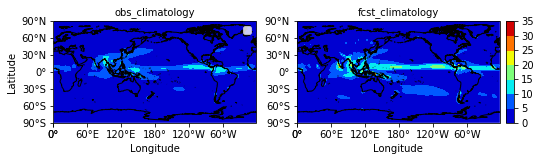

In [252]:
lat = ds.variables['Y'][:]
lon = ds.variables['X'][:]
obs_clim = clim(pcp_obs)
fcst_clim =clim(pcp_fcst)



from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


scale = '110m'
fig = plt.figure(figsize=(8, 10))

ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines('50m')
ax.set_global()
levels =[0,5,10,15,20,25,30,35]
cp= plt.contourf(lon, lat, obs_clim,transform=ccrs.PlateCarree(), levels = levels,cmap ='jet')
ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("obs_climatology", fontsize = '10')
#cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.005,ax1.get_position().height])

#fig.colorbar(cp, orientation="horizontal", pad=10)
#plt.colorbar(cp, cax=cax) 
#gl = ax.gridlines()
fig1 = plt.gcf()

#plt.draw()
fig1.savefig('MSSS_MJJ_2003_2019(1).png')
plt.legend()

levels =[0,5,10,15,20,25,30,35]
ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree(central_longitude=180))
ax2.coastlines('50m')
cp= plt.contourf(lon, lat, fcst_clim,transform=ccrs.PlateCarree(), levels = levels, cmap = 'jet')

ax2.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax2.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)
plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.title("fcst_climatology", fontsize = '10')
cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.015,ax2.get_position().height])
plt.colorbar(cp, cax=cax) 
    
    

In [24]:
Bias_Correction         = BC(pcp_fcst, pcp_obs)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
for i in range(1, 5):
    plt.subplot(2, 2, i)